In [3]:
# Importation de la bibliothèque pandas pour la manipulation de données sous forme de DataFrame
import pandas as pd
# Importation de la bibliothèque matplotlib pour la création de graphiques
import matplotlib.pyplot as plt
# Importation de la bibliothèque numpy pour les opérations numériques et les tableaux multidimensionnels
import numpy as np
# Importation de la bibliothèque warnings pour gérer les avertissements Python
import warnings
# Désactivation des avertissements pour ne pas les afficher pendant l'exécution du code
warnings.filterwarnings('ignore')

In [4]:
dataset = pd.read_csv('crimes.csv',sep = ';')
dataset.head()


,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


## Statistical description

In [5]:
dataset.shape

(50, 8)

In [6]:
dataset.describe()

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,7.444000,25.73400,124.092000,211.300000,1291.904000,2671.288000,377.526000
std,3.866769,10.75963,88.348567,100.253049,432.455711,725.908707,193.394418
min,0.900000,9.00000,13.300000,43.800000,446.100000,1239.900000,144.400000
25%,4.225000,18.32500,64.950000,148.850000,1000.075000,2248.900000,245.775000
50%,7.300000,24.10000,106.050000,197.600000,1265.050000,2617.450000,333.850000
75%,10.100000,32.52500,155.850000,282.575000,1529.825000,3007.600000,460.125000
max,15.800000,51.60000,472.600000,485.300000,2453.100000,4467.400000,1140.100000


## Boxplot

In [9]:
import seaborn as sns
sns.set(style='whitegrid')

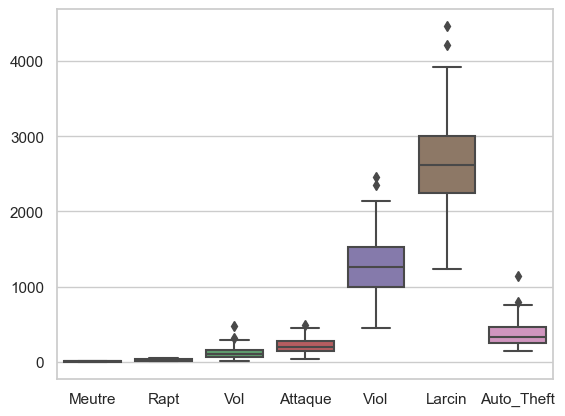

In [10]:
# Création d'un graphique en boîte (boxplot) avec les données de 'dataset' en utilisant seaborn
sns.boxplot(data=dataset)

# Affichage du graphique généré
plt.show()

## Scatterpolt only quantitative variables

In [11]:
sns.set(style='ticks')

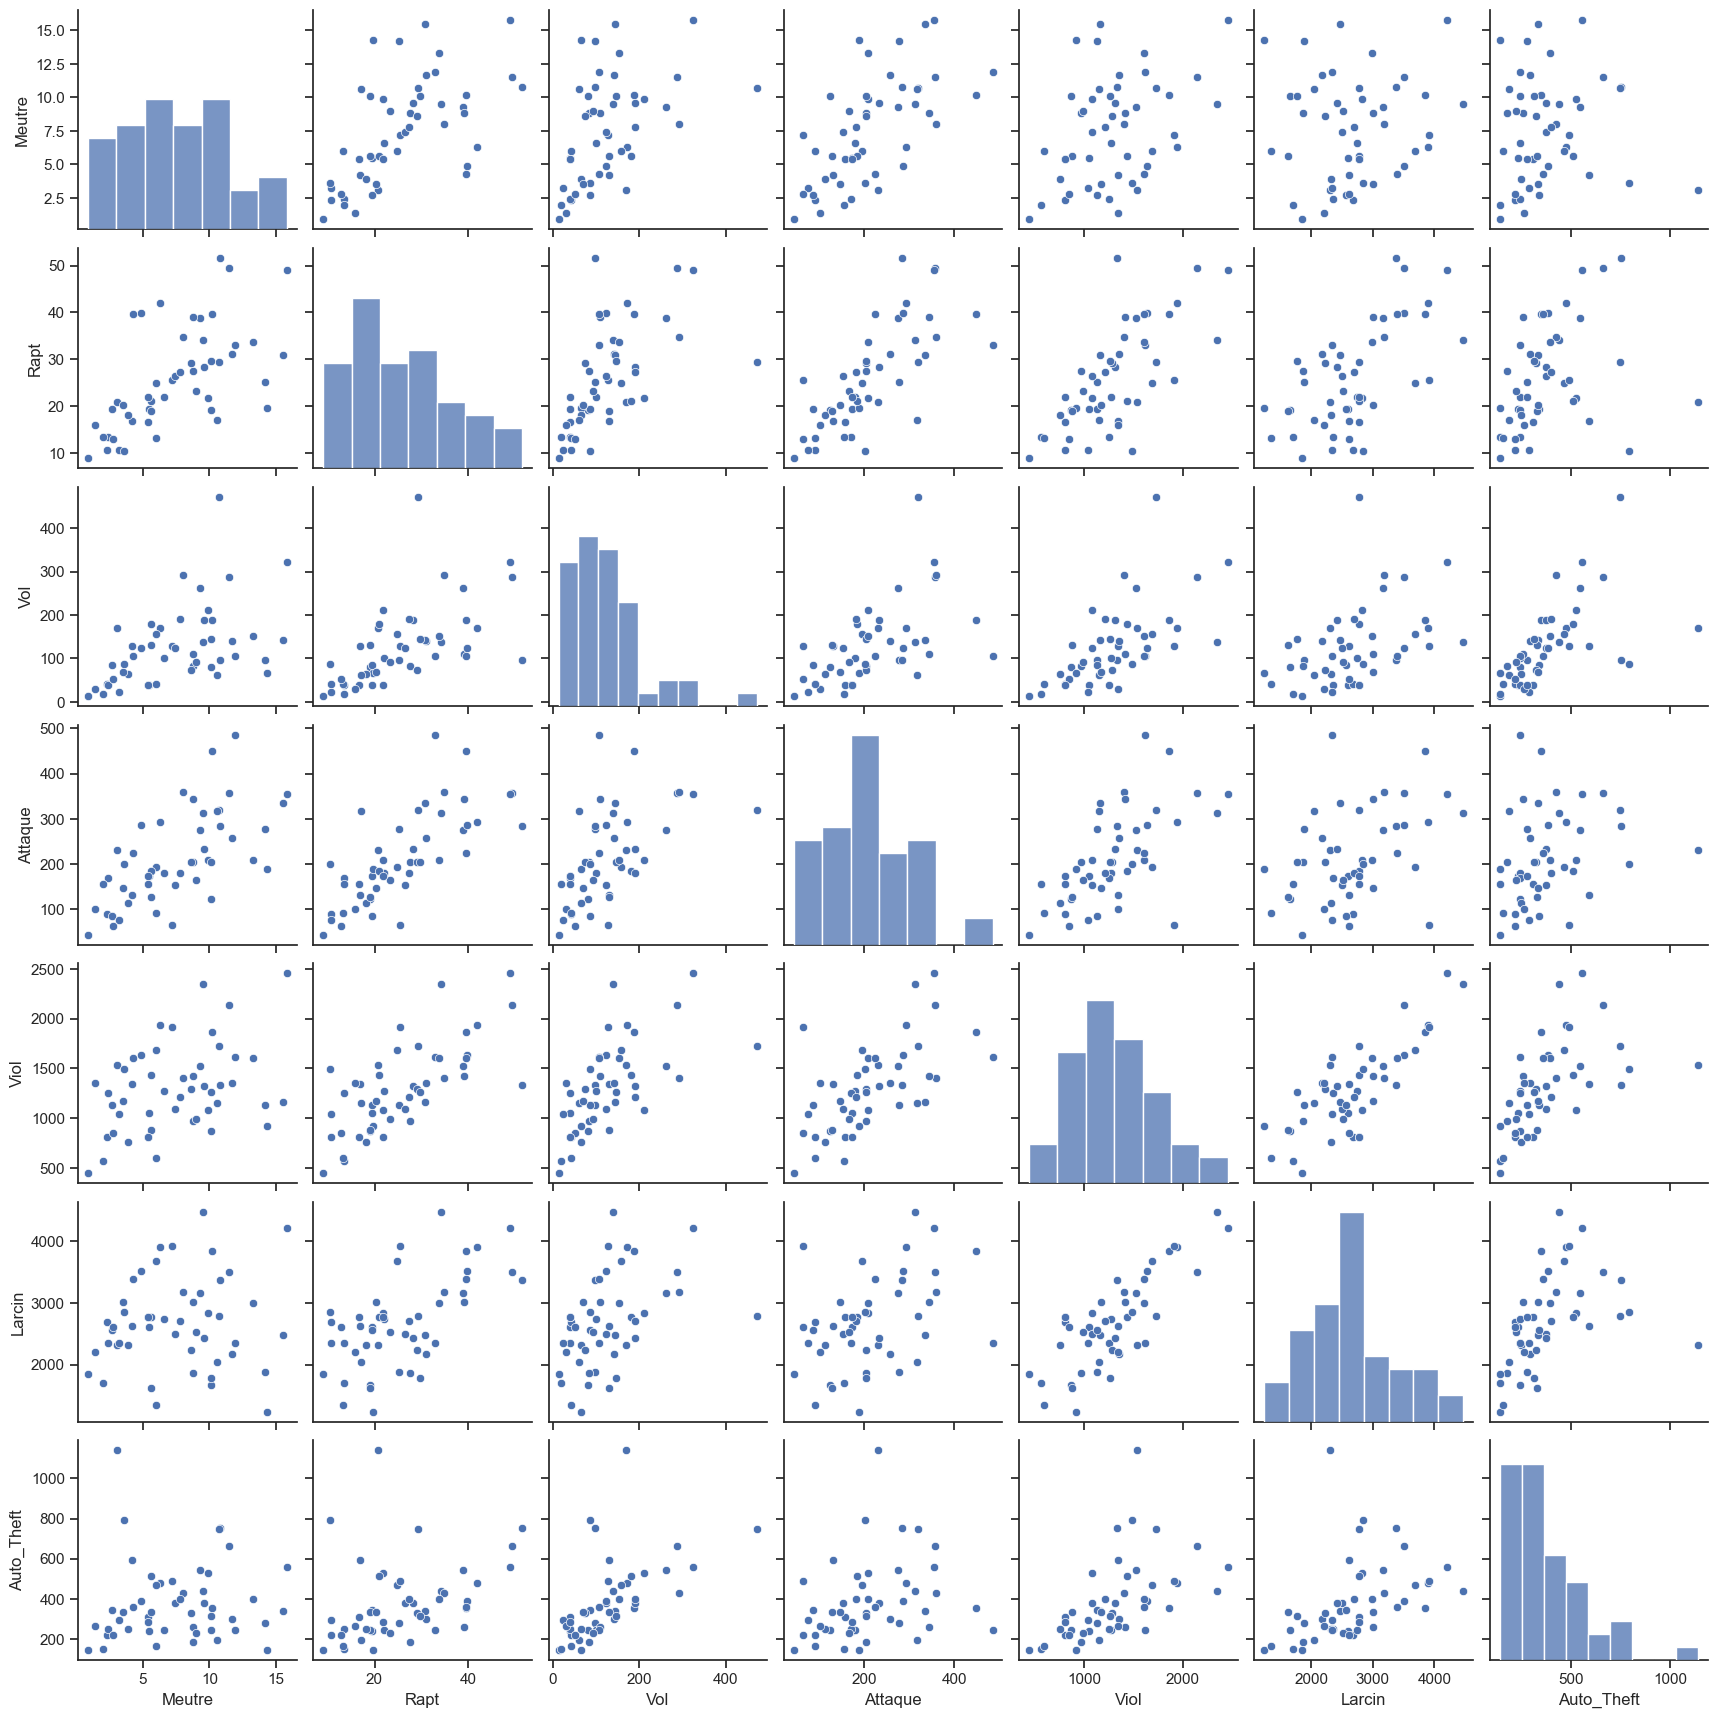

In [12]:
sns.pairplot(dataset)
plt.show()

## Correlation

In [15]:
# selection des colonnes numérique
numeric_data = dataset.select_dtypes(include=['float64', 'int64'])
#calcul de la matrice de corrélation
correlations = numeric_data.corr(method='pearson')# Méthodes disponibles : 'pearson', 'spearman', 'kendall'
correlations

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
Meutre,1.000000,0.601220,0.483708,0.648550,0.385817,0.101920,0.068814
Rapt,0.601220,1.000000,0.591879,0.740260,0.712130,0.613988,0.348902
Vol,0.483708,0.591879,1.000000,0.557078,0.637242,0.446740,0.590680
Attaque,0.648550,0.740260,0.557078,1.000000,0.622909,0.404363,0.275843
Viol,0.385817,0.712130,0.637242,0.622909,1.000000,0.792121,0.557953
Larcin,0.101920,0.613988,0.446740,0.404363,0.792121,1.000000,0.444180
Auto_Theft,0.068814,0.348902,0.590680,0.275843,0.557953,0.444180,1.000000


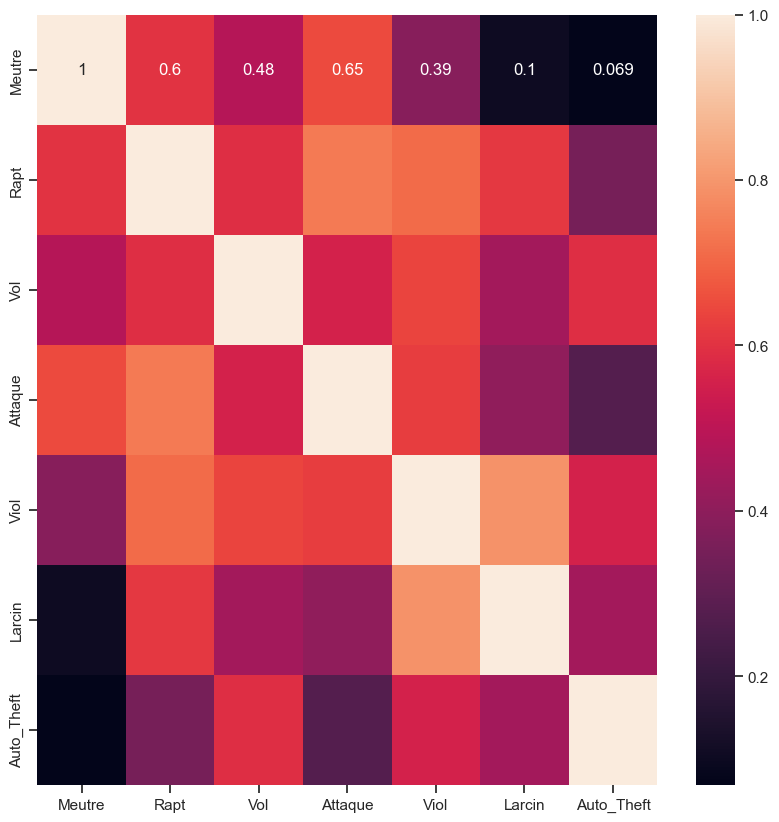

In [16]:
# Création d'une figure et d'un ensemble d'axes avec une taille personnalisée (10x10)
f, ax = plt.subplots(figsize=(10, 10))

# Création d'une carte de chaleur (heatmap) basée sur la matrice de corrélation 'correlations'
# Le paramètre 'annot=True' affiche les valeurs de corrélation dans chaque cellule de la heatmap
sns.heatmap(correlations, annot=True, ax=ax)

# Affichage de la heatmap générée
plt.show()

## Independent variables and labels

In [17]:
# Extraction des colonnes 1 à 7 (incluses) du DataFrame 'dataset' en tant que tableau numpy pour les caractéristiques
X = dataset.iloc[:, 1:8].values

# Extraction de la première colonne du DataFrame 'dataset' en tant que tableau numpy pour les étiquettes
labels = dataset.iloc[:, 0].values

# Affichage des étiquettes extraites
print(labels)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New-Hampshire' 'New-Jersey' 'New-Mexico' 'New-York'
 'North-Carolina ' 'North-Dakota' 'Ohio' 'Oklahoma' 'Oregon'
 'Pennsylvania' 'Rhode-Island' 'South-Carolina ' 'South-Dakota'
 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington'
 'West-Virginia' 'Wisconsin' 'Wyoming']


## Principal Component Analysis et Standarization

In [18]:
#Importation de la classe PCA de scikit-learn pour la réduction de dimensionnalité
from sklearn.decomposition import PCA

# Importation de la classe StandardScaler de scikit-learn pour la standarisation des données
from sklearn.preprocessing import StandardScaler #-2,2

In [19]:
# Création d'une instance de StandardScaler pour normaliser les données
scaler = StandardScaler()

# Application de la normalisation aux données X en ajustant (fit) et transformant (transform) les données
X_scaler = scaler.fit_transform(X)

In [20]:
# Création d'une instance de PCA pour la réduction de dimensionnalité
pca = PCA()

# Application de PCA aux données normalisées X_scaler pour réduire la dimensionnalité
# Le fit transforme les données selon les composantes principales, et transform applique cette réduction
X_pca = pca.fit_transform(X_scaler)

In [21]:
print(pca.explained_variance_ratio_) ## Affichage du ratio de variance expliquée par chaque composante principale je vais utilise les deux indic O/1

[0.58785136 0.17696026 0.10368809 0.04520458 0.03685349 0.03171992
 0.01772229]


In [22]:
print(sum(pca.explained_variance_ratio_[:2]))

0.7648116201908642


In [23]:
X_pca.shape

(50, 7)

## Visualization 

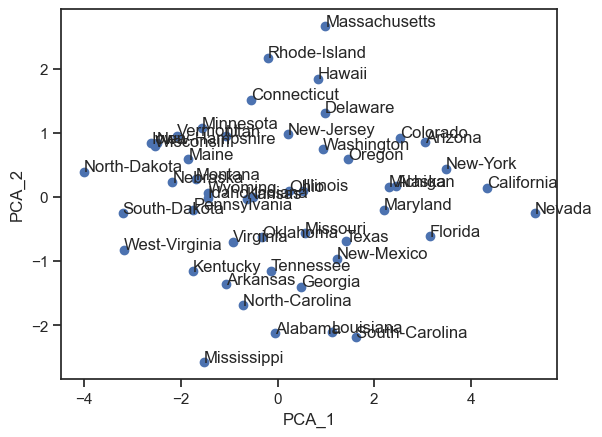

In [24]:
# Création d'un graphique de dispersion pour les deux premières composantes principales obtenues avec PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1])

# Ajout des étiquettes pour chaque point du graphique, en utilisant les coordonnées (x, y) et les labels correspondants
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y))

# Ajout d'une étiquette à l'axe des abscisses pour la première composante principale
plt.xlabel('PCA_1')

# Ajout d'une étiquette à l'axe des ordonnées pour la deuxième composante principale
plt.ylabel('PCA_2')

# Affichage du graphique généré
plt.show()

# KMeans Clustering

In [25]:
from sklearn.cluster import KMeans

In [26]:
# Création d'une instance de KMeans avec le nombre de clusters fixé à 4
# 'init='k-means++'' indique que l'initialisation des centroids se fait avec la méthode k-means++
# 'random_state=0' assure la reproductibilité des résultats en fixant la graine de génération aléatoire
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

# Entraînement du modèle KMeans sur les données X
# Le modèle apprend à diviser les données en 4 clusters
kmeans.fit(X)

# Attribution des étiquettes de clusters aux données X après l'entraînement du modèle
# 'y_kmeans' contient les labels de cluster pour chaque échantillon dans X
y_kmeans = kmeans.labels_

In [27]:
y_kmeans

array([0, 3, 2, 0, 2, 2, 3, 2, 2, 1, 2, 1, 3, 1, 1, 1, 0, 1, 1, 3, 3, 3,
       1, 0, 1, 1, 1, 2, 1, 3, 3, 3, 1, 0, 1, 1, 2, 0, 3, 1, 0, 0, 3, 3,
       1, 1, 3, 0, 1, 1])

## Clusters Visualization

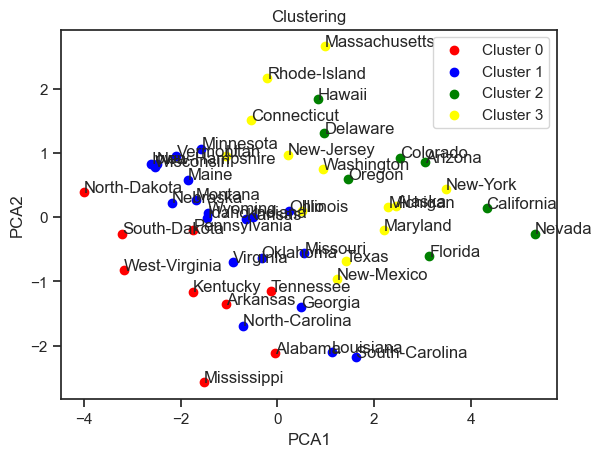

In [28]:
# Création d'un graphique de dispersion pour les points du Cluster 0, avec des points en rouge et étiquetés 'Cluster 0'
plt.scatter(X_pca[y_kmeans==0, 0], X_pca[y_kmeans==0, 1], c='red', label='Cluster 0')

# Création d'un graphique de dispersion pour les points du Cluster 1, avec des points en bleu et étiquetés 'Cluster 1'
plt.scatter(X_pca[y_kmeans==1, 0], X_pca[y_kmeans==1, 1], c='blue', label='Cluster 1')

# Création d'un graphique de dispersion pour les points du Cluster 2, avec des points en vert et étiquetés 'Cluster 2'
plt.scatter(X_pca[y_kmeans==2, 0], X_pca[y_kmeans==2, 1], c='green', label='Cluster 2')

# Création d'un graphique de dispersion pour les points du Cluster 3, avec des points en jaune et étiquetés 'Cluster 3'
plt.scatter(X_pca[y_kmeans==3, 0], X_pca[y_kmeans==3, 1], c='yellow', label='Cluster 3')

# Ajout des étiquettes pour chaque point sur le graphique, en utilisant les coordonnées (x, y) et les labels correspondants
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y))

# Ajout d'une étiquette à l'axe des abscisses pour la première composante principale
plt.xlabel('PCA1')

# Ajout d'une étiquette à l'axe des ordonnées pour la deuxième composante principale
plt.ylabel('PCA2')

# Ajout d'un titre au graphique pour indiquer qu'il représente le clustering
plt.title('Clustering')

# Affichage de la légende pour identifier les différents clusters
plt.legend()

# Affichage du graphique généré
plt.show()


In [29]:
kmeans2=KMeans(n_clusters=4,init='k-means++',random_state=0)
kmeans2.fit(X_scaler) 
# Entraînement du modèle KMeans sur les données standarisées X_scaler
y_kmeans_sc = kmeans2.labels_

In [30]:
y_kmeans_sc

array([2, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 3, 1, 2, 3, 2, 3, 2, 3, 0, 1, 0,
       3, 2, 2, 3, 3, 0, 3, 1, 2, 0, 2, 3, 1, 2, 0, 3, 1, 2, 3, 2, 2, 3,
       3, 2, 1, 3, 3, 3])

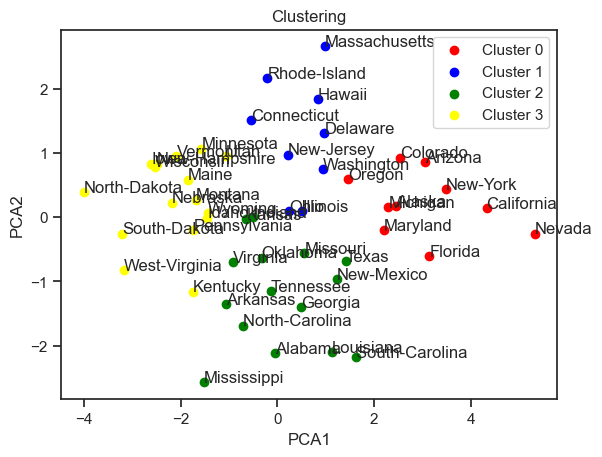

In [31]:
plt.scatter(X_pca[y_kmeans_sc==0,0],X_pca[y_kmeans_sc==0,1],c='red',label='Cluster 0')
plt.scatter(X_pca[y_kmeans_sc==1,0],X_pca[y_kmeans_sc==1,1],c='blue',label='Cluster 1')
plt.scatter(X_pca[y_kmeans_sc==2,0],X_pca[y_kmeans_sc==2,1],c='green',label='Cluster 2')
plt.scatter(X_pca[y_kmeans_sc==3,0],X_pca[y_kmeans_sc==3,1],c='yellow',label='Cluster 3')
for label,x,y in zip(labels,X_pca[:,0],X_pca[:,1]):
    plt.annotate(label,xy=(x,y))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clustering')
plt.legend()
plt.show()

In [32]:
kmeans3=KMeans(n_clusters=4,init='k-means++',random_state=0)
kmeans3.fit(X_pca) 
# Entraînement du modèle KMeans sur les données X_pca
y_kmeans_pca = kmeans3.labels_

In [33]:
y_kmeans_pca

array([2, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 3, 1, 2, 3, 2, 3, 2, 3, 0, 1, 0,
       3, 2, 2, 3, 3, 0, 3, 1, 2, 0, 2, 3, 1, 2, 0, 3, 1, 2, 3, 2, 2, 3,
       3, 2, 1, 3, 3, 3])

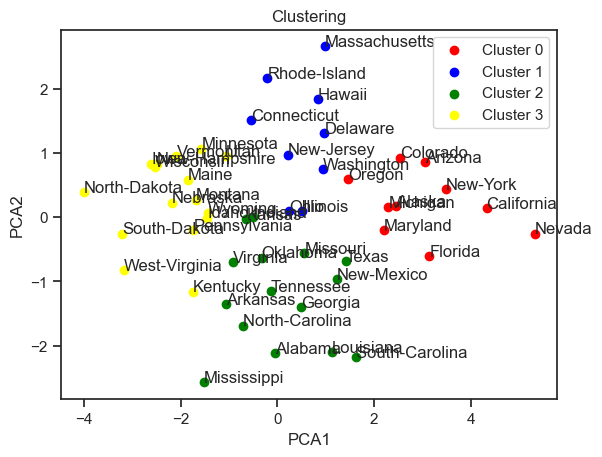

In [34]:
plt.scatter(X_pca[y_kmeans_pca==0,0],X_pca[y_kmeans_pca==0,1],c='red',label='Cluster 0')
plt.scatter(X_pca[y_kmeans_pca==1,0],X_pca[y_kmeans_pca==1,1],c='blue',label='Cluster 1')
plt.scatter(X_pca[y_kmeans_pca==2,0],X_pca[y_kmeans_pca==2,1],c='green',label='Cluster 2')
plt.scatter(X_pca[y_kmeans_pca==3,0],X_pca[y_kmeans_pca==3,1],c='yellow',label='Cluster 3')
for label,x,y in zip(labels,X_pca[:,0],X_pca[:,1]):
    plt.annotate(label,xy=(x,y))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clustering')
plt.legend()
plt.show()

In [35]:
kmeans2.cluster_centers_.shape
#nbcluster /nb caracteristique

(4, 7)

In [36]:
dataset.columns

Index(['Etat ', 'Meutre', 'Rapt', 'Vol', 'Attaque', 'Viol', 'Larcin',
       'Auto_Theft'],
      dtype='object')

In [37]:
col_names = ['Meutre', 'Rapt', 'Vol', 'Attaque', 'Viol', 'Larcin','Auto_Theft']

In [38]:
# Création d'un DataFrame à partir des centres de clusters obtenus avec KMeans
# 'kmeans2.cluster_centers_' contient les coordonnées des centres des clusters pour chaque cluster
# 'col_names' est une liste des noms de colonnes correspondant aux caractéristiques originales
cluster_centers = pd.DataFrame(data=kmeans2.cluster_centers_, columns=col_names)

# Affichage du DataFrame des centres de clusters
cluster_centers

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,0.589356,1.422899,1.273122,1.186755,1.269176,1.280971,0.823941
1,-0.443991,-0.244160,0.307023,-0.312357,0.435264,0.466950,1.093502
2,0.848854,0.189582,-0.136046,0.396727,-0.130770,-0.545479,-0.507316
3,-0.914403,-0.929706,-0.840858,-0.937952,-0.915474,-0.551880,-0.654449


In [39]:
# Création d'un DataFrame à partir des centres de clusters obtenus avec KMeans
# 'kmeans2.cluster_centers_' contient les coordonnées des centres des clusters pour chaque cluster
# 'col_names' est une liste des noms de colonnes correspondant aux caractéristiques originales
cluster_centers = pd.DataFrame(data=kmeans2.cluster_centers_, columns=col_names)

# Affichage du DataFrame des centres de clusters
cluster_centers

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,0.589356,1.422899,1.273122,1.186755,1.269176,1.280971,0.823941
1,-0.443991,-0.244160,0.307023,-0.312357,0.435264,0.466950,1.093502
2,0.848854,0.189582,-0.136046,0.396727,-0.130770,-0.545479,-0.507316
3,-0.914403,-0.929706,-0.840858,-0.937952,-0.915474,-0.551880,-0.654449


In [40]:
# Inversion de la normalisation des centres de clusters pour revenir aux échelles originales des données
# 'scaler.inverse_transform()' applique l'inverse de la transformation effectuée par StandardScaler
cluster_centers = scaler.inverse_transform(cluster_centers)

# Création d'un DataFrame avec les centres de clusters retransformés aux échelles originales des données
# 'col_names' est une liste des noms de colonnes correspondant aux caractéristiques originales
cluster_centers = pd.DataFrame(data=cluster_centers, columns=col_names)

# Affichage du DataFrame des centres de clusters retransformés
cluster_centers

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,9.700000,40.890000,235.440000,329.080000,1835.250000,3591.810000,535.270000
1,5.744444,23.133333,150.944444,180.300000,1478.244444,3006.844444,586.877778
2,10.693333,27.753333,112.193333,250.673333,1235.920000,2279.300000,280.400000
3,3.943750,15.831250,50.550000,118.212500,899.981250,2274.700000,252.231250


In [41]:
dataset.describe()

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,7.444000,25.73400,124.092000,211.300000,1291.904000,2671.288000,377.526000
std,3.866769,10.75963,88.348567,100.253049,432.455711,725.908707,193.394418
min,0.900000,9.00000,13.300000,43.800000,446.100000,1239.900000,144.400000
25%,4.225000,18.32500,64.950000,148.850000,1000.075000,2248.900000,245.775000
50%,7.300000,24.10000,106.050000,197.600000,1265.050000,2617.450000,333.850000
75%,10.100000,32.52500,155.850000,282.575000,1529.825000,3007.600000,460.125000
max,15.800000,51.60000,472.600000,485.300000,2453.100000,4467.400000,1140.100000


In [42]:
# Création d'un DataFrame contenant les données d'origine du dataset et les étiquettes de cluster
# 'pd.DataFrame({'Cluster': y_kmeans_sc})' crée un DataFrame avec une colonne nommée 'Cluster' contenant les labels de clusters
# 'pd.concat()' combine le DataFrame d'origine avec ce nouveau DataFrame des clusters le long de l'axe des colonnes (axis=1)
dataset_cluster = pd.concat([dataset, pd.DataFrame({'Cluster': y_kmeans_sc})], axis=1)

# Affichage des premières lignes du DataFrame résultant pour vérifier l'ajout des labels de cluster
dataset_cluster.head()

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft,Cluster
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7,2
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3,0
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5,0
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4,2
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5,0


In [44]:
#convertir du pandas a numpy
Xc = dataset_cluster.iloc[:,1:8].values
yc = dataset_cluster.iloc[:,8].values

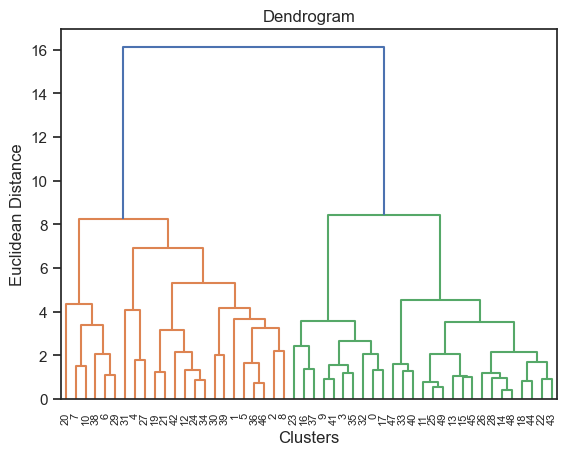

In [45]:
# Importation du module scipy.cluster.hierarchy pour le clustering hiérarchique
import scipy.cluster.hierarchy as sch

# Création du dendrogramme en utilisant la méthode de linkage 'ward' sur les données réduites avec PCA
# 'sch.linkage(X_pca, method='ward')' calcule les distances hiérarchiques entre les clusters
# 'sch.dendrogram()' génère le dendrogramme à partir des distances calculées
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))

# Ajout d'un titre au dendrogramme
plt.title('Dendrogram')

# Ajout d'une étiquette à l'axe des abscisses pour indiquer les clusters
plt.xlabel('Clusters')

# Ajout d'une étiquette à l'axe des ordonnées pour indiquer la distance euclidienne
plt.ylabel('Euclidean Distance')

# Affichage du dendrogramme
plt.show()

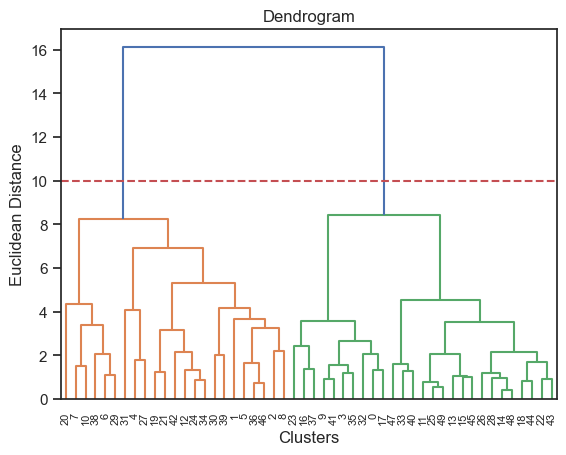

In [46]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Supposons que X_pca est votre jeu de données réduit par PCA
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))

# Choisissez une hauteur pour la coupe
cut_height = 10  # Modifiez cette valeur selon vos besoins

# Ajoutez une ligne horizontale au dendrogramme
plt.axhline(y=cut_height, color='r', linestyle='--')

plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()


In [47]:
# Importation de la classe AgglomerativeClustering pour le clustering hiérarchique agglomératif
from sklearn.cluster import AgglomerativeClustering 

# Création d'une instance d'AgglomerativeClustering avec les paramètres suivants :
# 'n_clusters=2' indique le nombre de clusters souhaité
# 'affinity='euclidean'' spécifie que la distance euclidienne sera utilisée pour mesurer la similarité entre les échantillons
# 'linkage='ward'' indique que la méthode de Ward sera utilisée pour fusionner les clusters en minimisant la variance intra-cluster
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

# Entraînement du modèle de clustering hiérarchique agglomératif sur les données normalisées X_scaler
# 'hc.fit(X_scaler)' ajuste le modèle aux données pour déterminer les clusters
hc.fit(X_scaler)

# Attribution des labels de clusters aux données après l'entraînement du modèle
# 'y_hc' contient les labels de cluster pour chaque échantillon dans X_scaler
y_hc = hc.labels_

In [48]:
y_hc

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0], dtype=int64)

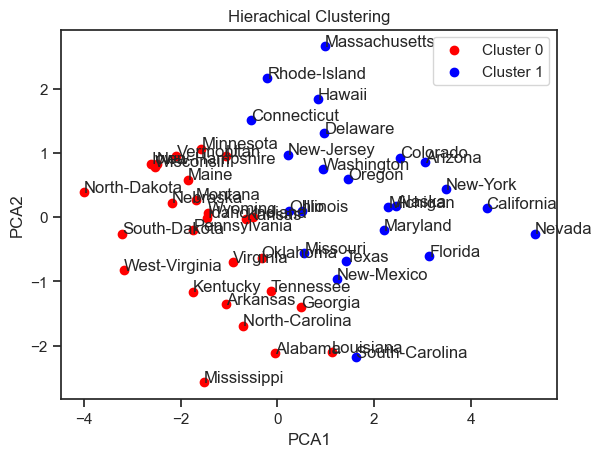

In [49]:
plt.scatter(X_pca[y_hc==0,0],X_pca[y_hc==0,1],c='red',label='Cluster 0')
plt.scatter(X_pca[y_hc==1,0],X_pca[y_hc==1,1],c='blue',label='Cluster 1')
for label,x,y in zip(labels,X_pca[:,0],X_pca[:,1]):
    plt.annotate(label,xy=(x,y))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Hierachical Clustering')
plt.legend()
plt.show()

In [ ]:
SILLOUHETTE SCORE :b-a/ max(b,a)= negative--> une mauvaise repartition
cohesion:

In [51]:
from sklearn.metrics import silhouette_score

In [52]:
# Définition des plages de valeurs pour le nombre de clusters (2 à 10) et les différentes graines aléatoires (0 à 9)
cluster_range = range(2, 11)
random_range = range(0, 10)

# Création d'une liste pour stocker les scores de silhouette pour différentes configurations
silhouette = []

# Boucle à travers toutes les combinaisons de nombres de clusters et graines aléatoires
for i in cluster_range:
    for j in random_range:
        # Création d'une instance de KMeans avec le nombre de clusters et la graine aléatoire spécifiés
        cluster = KMeans(n_clusters=i, random_state=j)
        
        # Entraînement du modèle KMeans sur les données normalisées X_scaler
        cluster.fit(X_scaler)
        
        # Attribution des labels de clusters aux données après l'entraînement du modèle
        cluster_labels = cluster.labels_
        
        # Calcul du score de silhouette moyen pour la configuration actuelle
        # Le score de silhouette mesure la qualité du clustering en termes de cohésion et séparation des clusters
        silhouette_avg = silhouette_score(X_scaler, cluster_labels)
        
        # Affichage du nombre de clusters, de la graine aléatoire, et du score de silhouette moyen
        print("For n_clusters=", i, "and seed=", j, "silhouette avg:", silhouette_avg)
        
        # Ajout des résultats à la liste silhouette
        # Chaque élément est une liste contenant le nombre de clusters, la graine aléatoire, et le score de silhouette moyen
        silhouette.append([i, j, silhouette_avg])

For n_clusters= 2 and seed= 0 silhouette avg: 0.3206059508171855
For n_clusters= 2 and seed= 1 silhouette avg: 0.3206059508171855
For n_clusters= 2 and seed= 2 silhouette avg: 0.3206059508171855
For n_clusters= 2 and seed= 3 silhouette avg: 0.3206059508171855
For n_clusters= 2 and seed= 4 silhouette avg: 0.3206059508171855
For n_clusters= 2 and seed= 5 silhouette avg: 0.3206059508171855
For n_clusters= 2 and seed= 6 silhouette avg: 0.3206059508171855
For n_clusters= 2 and seed= 7 silhouette avg: 0.3206059508171855
For n_clusters= 2 and seed= 8 silhouette avg: 0.3206059508171855
For n_clusters= 2 and seed= 9 silhouette avg: 0.3206059508171855
For n_clusters= 3 and seed= 0 silhouette avg: 0.24729122630170897
For n_clusters= 3 and seed= 1 silhouette avg: 0.25677174116114077
For n_clusters= 3 and seed= 2 silhouette avg: 0.25677174116114077
For n_clusters= 3 and seed= 3 silhouette avg: 0.25677174116114077
For n_clusters= 3 and seed= 4 silhouette avg: 0.25677174116114077
For n_clusters= 3 an

In [53]:
silhouette=pd.DataFrame(silhouette,columns=["n_clusters","seed","silhouette_score"])
silhouette

,n_clusters,seed,silhouette_score
0,2,0,0.320606
1,2,1,0.320606
2,2,2,0.320606
3,2,3,0.320606
4,2,4,0.320606
...,...,...,...
85,10,5,0.224097
86,10,6,0.223522
87,10,7,0.234193
88,10,8,0.224872


In [54]:
# Création d'un DataFrame à partir de la liste 'silhouette' avec les colonnes appropriées
# 'silhouette' est une liste contenant des informations sur le nombre de clusters, la graine aléatoire, et le score de silhouette moyen
# 'index="n_clusters"' utilise le nombre de clusters comme index du tableau pivot
# 'columns="seed"' utilise les graines aléatoires comme colonnes du tableau pivot
# 'values="silhouette_score"' spécifie que les valeurs du tableau pivot sont les scores de silhouette
pivot_silhouette = pd.pivot_table(pd.DataFrame(silhouette, columns=["n_clusters", "seed", "silhouette_score"]),
                                  index="n_clusters", 
                                  columns="seed", 
                                  values="silhouette_score")

# Affichage du tableau pivot qui montre les scores de silhouette pour chaque nombre de clusters et graine aléatoire
pivot_silhouette

seed,0,1,2,3,4,5,6,7,8,9
n_clusters,,,,,,,,,,
2,0.320606,0.320606,0.320606,0.320606,0.320606,0.320606,0.320606,0.320606,0.320606,0.320606
3,0.247291,0.256772,0.256772,0.256772,0.256772,0.256772,0.255033,0.255561,0.247291,0.255033
4,0.270762,0.276285,0.274255,0.274042,0.278262,0.276445,0.279387,0.278406,0.278262,0.271237
5,0.268347,0.266343,0.266781,0.271138,0.274313,0.275673,0.266437,0.271138,0.263845,0.282233
6,0.218436,0.257925,0.234722,0.221389,0.245926,0.253785,0.265558,0.261911,0.239352,0.263266
7,0.241540,0.218649,0.275612,0.222042,0.215008,0.232513,0.227878,0.241397,0.217796,0.268281
8,0.241798,0.230274,0.253110,0.203604,0.170967,0.224968,0.208713,0.206083,0.214125,0.200181
9,0.208536,0.242209,0.233982,0.198035,0.209738,0.228029,0.220420,0.232836,0.192859,0.220673
10,0.222446,0.180728,0.225487,0.186253,0.228285,0.224097,0.223522,0.234193,0.224872,0.210936


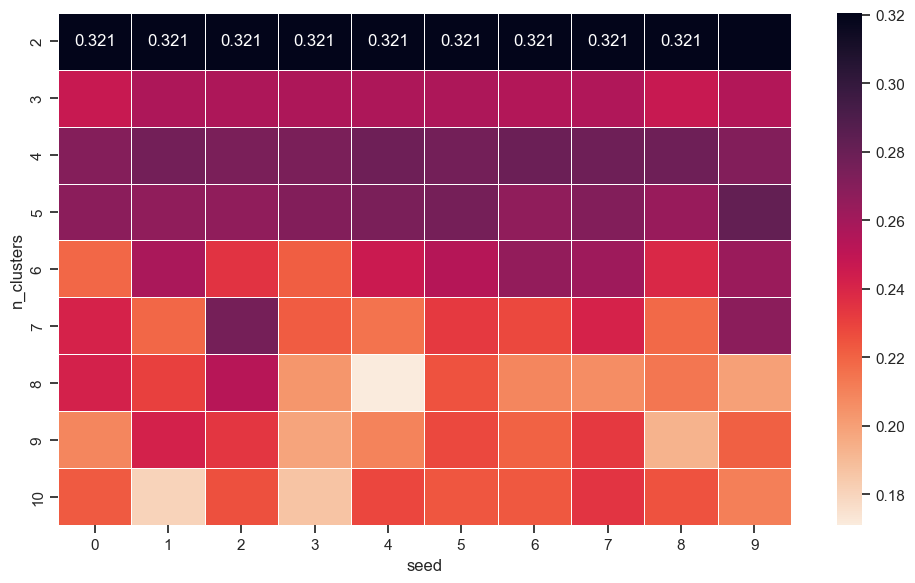

In [55]:
# Création d'une nouvelle figure avec une taille de 10x6 pouces
plt.figure(figsize=(10, 6))

# Création d'une carte thermique (heatmap) du tableau pivot 'pivot_silhouette'
# 'annot=True' affiche les valeurs dans les cellules du heatmap
# 'linewidths=.5' ajoute des lignes de séparation entre les cellules
# 'fmt='.3f'' formate les valeurs affichées avec trois décimales
# 'cmap=sns.cm.rocket_r' utilise la palette de couleurs 'rocket_r' de seaborn pour colorer le heatmap
sns.heatmap(pivot_silhouette, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)

# Ajuste la disposition du graphique pour qu'il s'adapte mieux à la figure
plt.tight_layout()

# Affiche la figure contenant le heatmap
plt.show()